
Carolyn Massa:  Capstone 2 - Notebook 3 of 5 notebooks
This notebook contains my two models - Hedonic and XG BOOST

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import pandas as pd

import time

#Stats Modeling/Comparisons of Means


from shapely.geometry import Point
import shapely.ops as sp_ops
import pyproj
import functools

import ipywidgets as widgets

#Data Modeling/Algorithms

from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb

from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time



from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from statsmodels.compat import lzip
import scipy.stats as stats
import math
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas_profiling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from IPython.display import SVG
from statsmodels.tsa.seasonal import seasonal_decompose
import sklearn
import scipy

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from xgboost import plot_importance
from xgboost import XGBClassifier
from xgboost import plot_tree

In [3]:
listing_2019_April_3 = pd.read_csv('listing_2019_April_3',low_memory=False) # Here I import my cleaned data set from my primary notebook

In [4]:
def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    listing_2019_April_3[col] = pd.cut(listing_2019_April_3[col], bins=bins, labels=labels, include_lowest=True)
    listing_2019_April_3[col] = listing_2019_April_3[col].astype('str')
    listing_2019_April_3[col].fillna(na_label, inplace=True)

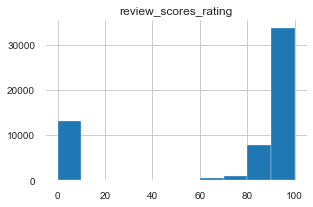

In [4]:
plot_reviews = list(listing_2019_April_3.columns[listing_2019_April_3.columns.str.startswith("review_scores_rating") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(plot_reviews):
    ax = fig.add_subplot(3,3,i+1)
    listing_2019_April_3[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [5]:
plot_reviews.pop(0)

'review_scores_rating'

In [6]:
pd.set_option('display.max_columns', None)
listing_2019_April_3.head(5)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,host_response_time,instant_bookable,host_response_rate,host_is_superhost,guests_included,extra_people,neighbourhood,beds,smart_location,property_type,room_type,accommodates,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,minimum_nights,number_of_reviews,reviews_per_month,cancellation_policy,calculated_host_listings_count,availability_30,availability_60,availability_90,availability_365,last_review,rating_ind,check_in_24h,wifi,heating,washer_dryer,kitchen,Toiletries,hangers,laptop space,family_friendly,fire protection,refrigerator,elevator,bed linens,coffee_maker,hot_water,tv,self_check_in,hair_dryer,dryer,GroupedbyPriceRange,Rating_By_Range,security_deposit,host_seniority,close_to_attraction
0,0,0,0,within an hour,0,100%,1,1,0,Temple,1.0,"Paris, France",Apartment,Entire home/apt,2,89.0,9.0,8.0,9.0,9.0,9.0,9.0,52,7,71,0.56,moderate,2,9,31,52,315,2015-09-05,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0-100,51.0-75.0,200,>= 8 years,1.0
1,1,1,1,0,1,NaN,0,1,0,Entrepôt,2.0,"Paris, France",Other,Entire home/apt,4,100.0,10.0,10.0,10.0,10.0,10.0,10.0,125,3,1,0.31,strict_14_with_grace_period,1,0,0,0,148,2019-01-02,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,101-150,NaN,0,>= 8 years,1.0
2,2,2,2,within an hour,0,100%,0,1,0,Observatoire,0.0,"Paris, France",Apartment,Entire home/apt,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,75,3,8,0.29,flexible,1,15,15,15,277,2018-12-19,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0-100,51.0-75.0,0,>= 8 years,1.0
3,3,3,3,within an hour,1,100%,0,1,0,Hôtel-de-Ville,1.0,"Paris, France",Apartment,Entire home/apt,2,91.0,9.0,8.0,9.0,9.0,10.0,9.0,115,1,168,1.41,strict_14_with_grace_period,1,1,1,21,59,2019-03-25,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,101-150,NaN,0,>= 8 years,1.0
4,4,4,4,within an hour,0,100%,1,2,10,Hôtel-de-Ville,2.0,"Paris, France",Apartment,Entire home/apt,4,94.0,10.0,9.0,10.0,10.0,10.0,10.0,115,10,241,2.47,moderate,2,0,10,23,216,2019-03-22,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,101-150,NaN,200,>= 8 years,1.0


In [7]:
listing_2019_April_3.drop(['last_review','rating_ind','beds','GroupedbyPriceRange','smart_location','Rating_By_Range','review_scores_rating'], axis=1,inplace=True)

In [8]:
for col in plot_reviews: #I bin my 
    bin_column(col,
               bins=[0, 8, 9, 10],
               labels=['0-8/10', '9/10', '10/10'],
               na_label='no reviews')

In [9]:
listing_2019_April_3.host_response_rate.replace('nan', 'unknown', inplace=True)

In [10]:
pd.set_option('display.max_columns', None)
listing_2019_April_3.head(4)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,host_response_time,instant_bookable,host_response_rate,host_is_superhost,guests_included,extra_people,neighbourhood,property_type,room_type,accommodates,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,minimum_nights,number_of_reviews,reviews_per_month,cancellation_policy,calculated_host_listings_count,availability_30,availability_60,availability_90,availability_365,check_in_24h,wifi,heating,washer_dryer,kitchen,Toiletries,hangers,laptop space,family_friendly,fire protection,refrigerator,elevator,bed linens,coffee_maker,hot_water,tv,self_check_in,hair_dryer,dryer,security_deposit,host_seniority,close_to_attraction
0,0,0,0,within an hour,0,100%,1,1,0,Temple,Apartment,Entire home/apt,2,9.0,8.0,9.0,9.0,9.0,9.0,52,7,71,0.56,moderate,2,9,31,52,315,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,200,>= 8 years,1.0
1,1,1,1,0,1,NaN,0,1,0,Entrepôt,Other,Entire home/apt,4,10.0,10.0,10.0,10.0,10.0,10.0,125,3,1,0.31,strict_14_with_grace_period,1,0,0,0,148,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,>= 8 years,1.0
2,2,2,2,within an hour,0,100%,0,1,0,Observatoire,Apartment,Entire home/apt,2,10.0,10.0,10.0,10.0,10.0,10.0,75,3,8,0.29,flexible,1,15,15,15,277,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,>= 8 years,1.0
3,3,3,3,within an hour,1,100%,0,1,0,Hôtel-de-Ville,Apartment,Entire home/apt,2,9.0,8.0,9.0,9.0,10.0,9.0,115,1,168,1.41,strict_14_with_grace_period,1,1,1,21,59,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0,>= 8 years,1.0


In [11]:
listing_2019_April_3.drop(listing_2019_April_3.columns[0:3], axis = 1,inplace=True) 

In [12]:
listing_2019_April_3.head(5)

,host_response_time,instant_bookable,host_response_rate,host_is_superhost,guests_included,extra_people,neighbourhood,property_type,room_type,accommodates,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,minimum_nights,number_of_reviews,reviews_per_month,cancellation_policy,calculated_host_listings_count,availability_30,availability_60,availability_90,availability_365,check_in_24h,wifi,heating,washer_dryer,kitchen,Toiletries,hangers,laptop space,family_friendly,fire protection,refrigerator,elevator,bed linens,coffee_maker,hot_water,tv,self_check_in,hair_dryer,dryer,security_deposit,host_seniority,close_to_attraction
0,within an hour,0,100%,1,1,0,Temple,Apartment,Entire home/apt,2,9.0,8.0,9.0,9.0,9.0,9.0,52,7,71,0.56,moderate,2,9,31,52,315,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,200,>= 8 years,1.0
1,0,1,NaN,0,1,0,Entrepôt,Other,Entire home/apt,4,10.0,10.0,10.0,10.0,10.0,10.0,125,3,1,0.31,strict_14_with_grace_period,1,0,0,0,148,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,>= 8 years,1.0
2,within an hour,0,100%,0,1,0,Observatoire,Apartment,Entire home/apt,2,10.0,10.0,10.0,10.0,10.0,10.0,75,3,8,0.29,flexible,1,15,15,15,277,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,>= 8 years,1.0
3,within an hour,1,100%,0,1,0,Hôtel-de-Ville,Apartment,Entire home/apt,2,9.0,8.0,9.0,9.0,10.0,9.0,115,1,168,1.41,strict_14_with_grace_period,1,1,1,21,59,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0,>= 8 years,1.0
4,within an hour,0,100%,1,2,10,Hôtel-de-Ville,Apartment,Entire home/apt,4,10.0,9.0,10.0,10.0,10.0,10.0,115,10,241,2.47,moderate,2,0,10,23,216,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,200,>= 8 years,1.0


In [13]:
#Below I am applying "get_dummies" to my categorical variables

In [14]:
df_transformed = pd.get_dummies(listing_2019_April_3, columns=['host_seniority','host_response_time','host_response_rate','neighbourhood','room_type','property_type','cancellation_policy','review_scores_accuracy'])

In [15]:
pd.set_option('display.max_columns', None)
df_transformed.head(5)

,instant_bookable,host_is_superhost,guests_included,extra_people,accommodates,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_30,availability_60,availability_90,availability_365,check_in_24h,wifi,heating,washer_dryer,kitchen,Toiletries,hangers,laptop space,family_friendly,fire protection,refrigerator,elevator,bed linens,coffee_maker,hot_water,tv,self_check_in,hair_dryer,dryer,security_deposit,close_to_attraction,host_seniority_1 year,host_seniority_2 years,host_seniority_3 years,host_seniority_4 years,host_seniority_5 years,host_seniority_6 years,host_seniority_7 years,host_seniority_>= 8 years,host_response_time_0,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_rate_0-49%,host_response_rate_100%,host_response_rate_50-89%,host_response_rate_90-99%,neighbourhood_Batignolles-Monceau,neighbourhood_Bourse,neighbourhood_Buttes-Chaumont,neighbourhood_Buttes-Montmartre,neighbourhood_Entrepôt,neighbourhood_Gobelins,neighbourhood_Hôtel-de-Ville,neighbourhood_Louvre,neighbourhood_Luxembourg,neighbourhood_Ménilmontant,neighbourhood_Observatoire,neighbourhood_Opéra,neighbourhood_Palais-Bourbon,neighbourhood_Panthéon,neighbourhood_Passy,neighbourhood_Popincourt,neighbourhood_Reuilly,neighbourhood_Temple,neighbourhood_Vaugirard,neighbourhood_Élysée,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,property_type_Apartment,property_type_Hotel,property_type_House,property_type_Other,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,review_scores_accuracy_0.0,review_scores_accuracy_2.0,review_scores_accuracy_3.0,review_scores_accuracy_4.0,review_scores_accuracy_5.0,review_scores_accuracy_6.0,review_scores_accuracy_7.0,review_scores_accuracy_8.0,review_scores_accuracy_9.0,review_scores_accuracy_10.0
0,0,1,1,0,2,8.0,9.0,9.0,9.0,9.0,52,7,71,0.56,2,9,31,52,315,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,200,1.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,4,10.0,10.0,10.0,10.0,10.0,125,3,1,0.31,1,0,0,0,148,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,1.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,2,10.0,10.0,10.0,10.0,10.0,75,3,8,0.29,1,15,15,15,277,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,1,0,2,8.0,9.0,9.0,10.0,9.0,115,1,168,1.41,1,1,1,21,59,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,2,10,4,9.0,10.0,10.0,10.0,10.0,115,10,241,2.47,2,0,10,23,216,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,200,1.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


I realize I need to transform my host_senority column to integers so I write a loop function

In [16]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56361 entries, 0 to 56360
Data columns (total 100 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   instant_bookable                                 56361 non-null  int64  
 1   host_is_superhost                                56361 non-null  int64  
 2   guests_included                                  56361 non-null  int64  
 3   extra_people                                     56361 non-null  int64  
 4   accommodates                                     56361 non-null  int64  
 5   review_scores_cleanliness                        56361 non-null  float64
 6   review_scores_checkin                            56361 non-null  float64
 7   review_scores_communication                      56361 non-null  float64
 8   review_scores_location                           56361 non-null  float64
 9   review_scores_value        

In [17]:
def multi_collinearity_heatmap(df_transformed, figsize=(14,9)):
    
    """
    Creates a heatmap of correlations between features in the df. 
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df_transformed.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

#Let's review a heatmap with 99 Variables to work out what is unnecessary

In [18]:
import seaborn as sns

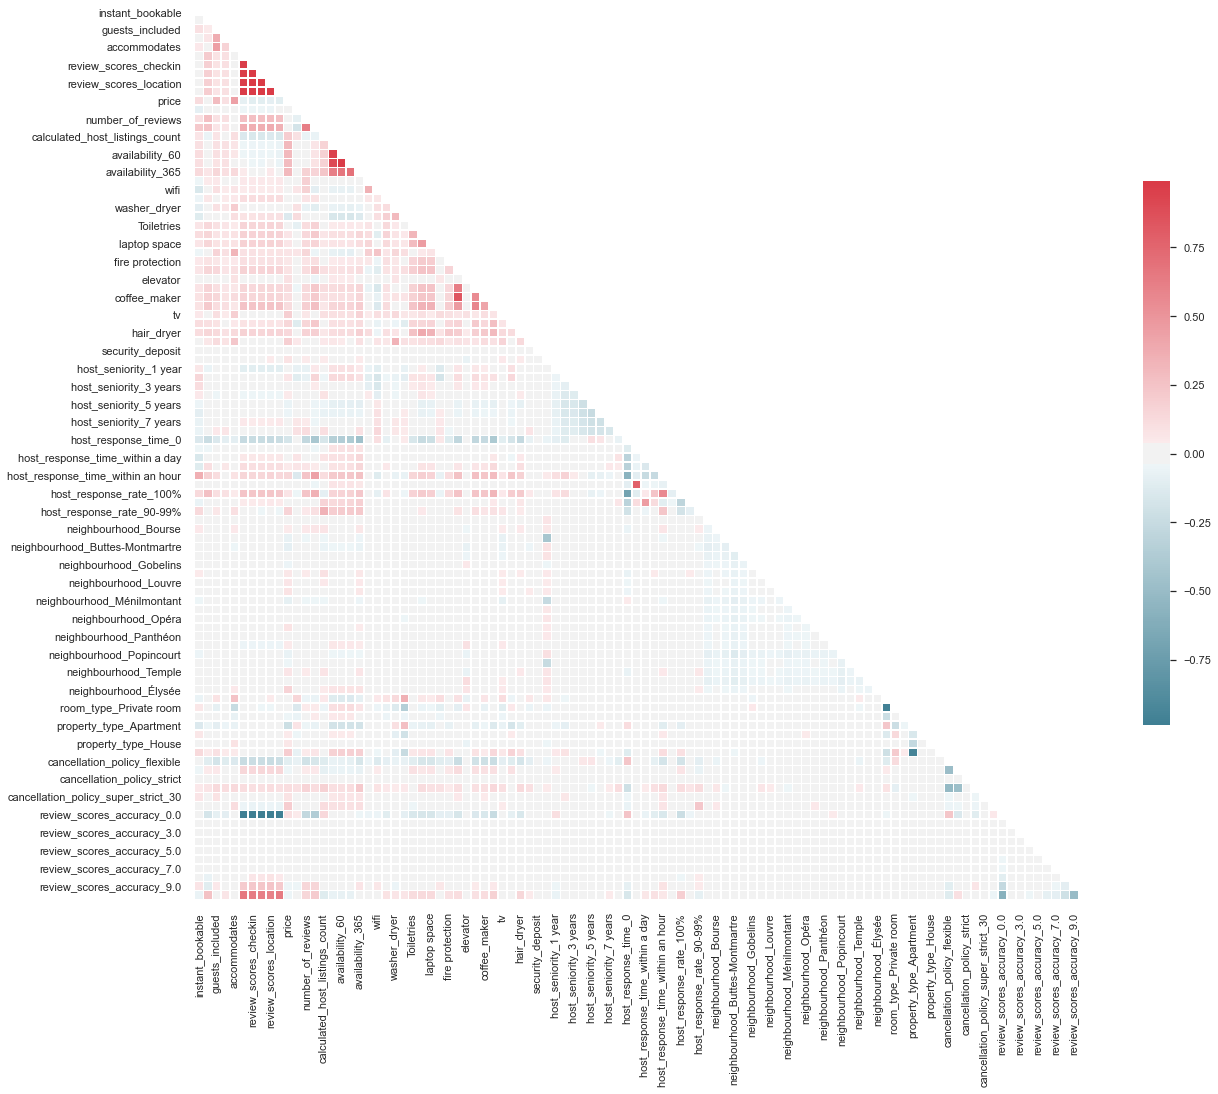

In [19]:


multi_collinearity_heatmap(df_transformed, figsize=(20,20))



We see the strongest correlations between the "host response within an hour" variable and the instant bookable, extra people, review score ratings and check in ratings.  This makes sense as if a host will be active enough to reply within an hour then they will be proactive in the check in and coordination processes, presumably. I drop review_scores_accuracy


In [20]:
df_transformed.drop(['review_scores_accuracy_0.0', 'availability_365'], axis=1,inplace=True)

In [21]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56361 entries, 0 to 56360
Data columns (total 98 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   instant_bookable                                 56361 non-null  int64  
 1   host_is_superhost                                56361 non-null  int64  
 2   guests_included                                  56361 non-null  int64  
 3   extra_people                                     56361 non-null  int64  
 4   accommodates                                     56361 non-null  int64  
 5   review_scores_cleanliness                        56361 non-null  float64
 6   review_scores_checkin                            56361 non-null  float64
 7   review_scores_communication                      56361 non-null  float64
 8   review_scores_location                           56361 non-null  float64
 9   review_scores_value         



Areas of in significance/multi-collinearity:

    Beds and the number of people that a property accommodates are highly correlated. The number of people accommodated has traditionally been an important search parameter on Airbnb, as it is the most relevant as we need a place to stay.
    I will drop some of the response rates as well as the whether the property is a private room or apartment as these have 
   There is a strong negative correlation between a 0 response time and host communications and availabilities and reviews so that will be dropped
host senority has a positive correlation with positive reviews, wifi, laptop space, min. nights., # of reviews, and laptop space.

    There are strong negative correlations between houses and apartments, and between private rooms and entire homes (as these were the main two categories of their features before they were one-hot encoded). Although these are important categories, one of each will be dropped in order to reduce multi-collinearity (apartments and private rooms, as these are the second most common categories).

I decide to drop unknown host response rates and ratings_which is just whether the property was rated or not . I also drop "beds" as it has multicollinearity with accommodates.


In [22]:
#Below I create a log transformation of my 

In [23]:
numerical_columns = ['accommodates', 'availability_30','availability_60','availability_90', 'extra_people', 'minimum_nights', 'number_of_reviews', 'price', 'security_deposit']

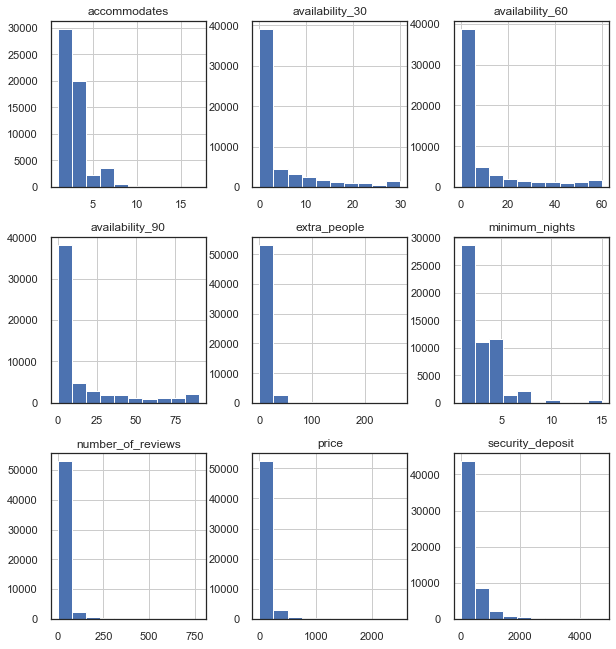

In [24]:
df_transformed[numerical_columns].hist(figsize=(10,11));

In [25]:
# Log transforming columns
numerical_columns = [i for i in numerical_columns if i not in ['availability_30', 'availability_60','availability_90','availability_365']] # Removing items not to be transformed

for col in numerical_columns:
    df_transformed[col] = df_transformed[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    df_transformed[col] = np.log(df_transformed[col])

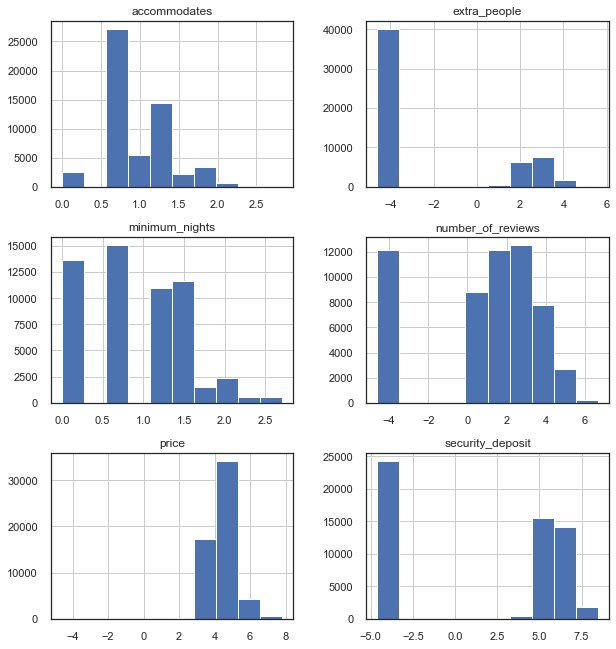

In [26]:
df_transformed[numerical_columns].hist(figsize=(10,11));

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
#Creating both our independent variables from our Dependent Variable (price)
X = df_transformed.drop('price', axis=1)
y = df_transformed.price
# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))



In [29]:
#I now begin my data and prepare to run my models which will be both RANDOM FOREST and XG Boost

In [30]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

I check for duplicate columns

In [31]:
duplicate_columns = X_train.loc[:,~X_train.columns.duplicated()] #Are these all duplicate variables or is the model seeing the prefixes?
duplicate_columns

,instant_bookable,host_is_superhost,guests_included,extra_people,accommodates,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_30,availability_60,availability_90,check_in_24h,wifi,heating,washer_dryer,kitchen,Toiletries,hangers,laptop space,family_friendly,fire protection,refrigerator,elevator,bed linens,coffee_maker,hot_water,tv,self_check_in,hair_dryer,dryer,security_deposit,close_to_attraction,host_seniority_1 year,host_seniority_2 years,host_seniority_3 years,host_seniority_4 years,host_seniority_5 years,host_seniority_6 years,host_seniority_7 years,host_seniority_>= 8 years,host_response_time_0,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_rate_0-49%,host_response_rate_100%,host_response_rate_50-89%,host_response_rate_90-99%,neighbourhood_Batignolles-Monceau,neighbourhood_Bourse,neighbourhood_Buttes-Chaumont,neighbourhood_Buttes-Montmartre,neighbourhood_Entrepôt,neighbourhood_Gobelins,neighbourhood_Hôtel-de-Ville,neighbourhood_Louvre,neighbourhood_Luxembourg,neighbourhood_Ménilmontant,neighbourhood_Observatoire,neighbourhood_Opéra,neighbourhood_Palais-Bourbon,neighbourhood_Panthéon,neighbourhood_Passy,neighbourhood_Popincourt,neighbourhood_Reuilly,neighbourhood_Temple,neighbourhood_Vaugirard,neighbourhood_Élysée,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,property_type_Apartment,property_type_Hotel,property_type_House,property_type_Other,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,review_scores_accuracy_2.0,review_scores_accuracy_3.0,review_scores_accuracy_4.0,review_scores_accuracy_5.0,review_scores_accuracy_6.0,review_scores_accuracy_7.0,review_scores_accuracy_8.0,review_scores_accuracy_9.0,review_scores_accuracy_10.0
21613,-0.718060,-0.35769,-0.462580,-0.632823,-0.687203,0.735789,0.622967,0.614581,0.395119,0.476056,0.321366,-0.025878,-0.623463,-0.194826,-0.534557,-0.550997,-0.573269,-0.372082,-0.747894,0.248661,-1.840035,0.250386,0.801805,0.678607,-1.206439,-0.788044,0.669504,-0.632919,-0.854886,-0.606536,-0.553212,-0.936355,-1.420390,-0.348153,0.710525,-0.645807,-1.141127,0.292929,-0.157780,-0.308056,-0.291785,2.410772,-0.509735,-0.485841,-0.411804,-0.372020,1.171749,-0.140563,-0.366778,-0.384888,-0.672813,-0.110345,-0.813650,-0.367058,-0.228211,-0.268463,-0.190813,-0.246360,-0.363877,-0.279024,-0.194822,-0.184686,-0.144451,-0.178164,-0.253413,-0.200157,-0.223701,-0.173119,-0.189511,-0.168108,-0.335363,-0.204810,-0.229028,3.501630,-0.163818,0.396503,-0.383216,-0.088703,-3.047414,-0.05008,-0.087063,3.235657,1.357174,-0.668476,-0.005957,-0.704652,-0.055004,-0.066749,-0.034499,-0.007296,-0.036013,-0.025281,-0.071792,-0.07825,-0.192307,2.109186,-1.066678
21131,1.392641,-0.35769,-0.462580,-0.632823,-0.687203,-1.760152,-1.785231,-1.789377,-1.786789,-1.771473,1.639185,-1.749703,-0.669836,-0.194826,-0.534557,-0.550997,-0.573269,-0.372082,-0.747894,-4.021537,-1.840035,0.250386,0.801805,0.678607,-1.206439,1.268965,0.669504,-0.632919,1.169747,-0.606536,-0.553212,-0.936355,0.704032,-0.348153,-1.407410,-0.645807,0.619398,0.292929,-0.157780,-0.308056,-0.291785,2.410772,-0.509735,-0.485841,-0.411804,-0.372020,1.171749,-0.140563,-0.366778,-0.384888,-0.672813,-0.110345,-0.813650,-0.367058,-0.228211,3.724903,-0.190813,-0.246360,-0.363877,-0.279024,-0.194822,-0.184686,-0.144451,-0.178164,-0.253413,-0.200157,-0.223701,-0.173119,-0.189511,-0.168108,-0.335363,-0.204810,-0.229028,-0.285581,-0.163818,0.396503,-0.383216,-0.088703,0.328147,-0.05008,-0.087063,-0.309056,-0.736825,1.495940,-0.005957,-0.704652,-0.055004,-0.066749,-0.034499,-0.007296,-0.036013,-0.025281,-0.071792,-0.07825,-0.19

In [32]:
X_train = X_train[X_train.columns.drop(list(X_train.filter(regex='review_scores_accuracy_')))]
X_test = X_test[X_test.columns.drop(list(X_test.filter(regex='review_scores_accuracy_')))]

The Two Chosen Models

 
Model 1: Spatial Hedonic Price Model (HPM)

The hedonic model involves regressing observed asking-prices for the listing against those attributes of a property hypothesized to be determinants of the asking-price. It comes from hedonic price theory which assumes that a commodity, such as a house can be viewed as an aggregation of individual components or attributes (Griliches, 1971). Consumers are assumed to purchase goods embodying bundles of attributes that maximize their underlying utility functions (Rosen, 1974).

In addition to the characteristics of the Airbnb listings, we add location features as they have been shown to be important factors in influencing the price (see here, here, here and here for examples). Ideally, Lagrange multiplier tests should be conducted to verify if there is spatial lag in the dependent variable and therefore a spatial lag model (see this post for spatial regression using Pysal) is preferred for estimating a spatial HPM. However, for the purposes of this post, we are only using a conventional OLS model for hedonic price estimation that includes spatial and locational features, but not a spatial lag that accounts for spatial dependence.

So, the first explanatory variables are the listings characteristics (acommodates, bathrooms, etc) and our second group of explanatory variables based on spatial and locational features are "close to an attraction" or 'not close to an attraction" which indicates, for example, how far an airbnb is from the Eiffel Tower or the Louvre Museum.


In [33]:
shpm_start = time.time()

# Create instance of the model, `LinearRegression` function from 
# Scikit-Learn and fit the model on the training data:

hpm_reg = LinearRegression()  
hpm_reg.fit(X_train, y_train) #training the algorithm

# Now that the model has been fit we can make predictions by calling 
# the predict command. We are making predictions on the testing set:
training_preds_hpm_reg = hpm_reg.predict(X_train)
val_preds_hpm_reg = hpm_reg.predict(X_test)

shpm_end = time.time()

print(f"Time taken to run: {round((shpm_end - shpm_start)/60,1)} minutes")

# Check the predictions against the actual values by using the MSE and R-2 metrics:
print("\nTraining RMSE:", round(mean_squared_error(y_train, training_preds_hpm_reg),4))
print("Validation RMSE:", round(mean_squared_error(y_test, val_preds_hpm_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_hpm_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_hpm_reg),4))

Time taken to run: 0.0 minutes

Training RMSE: 0.1696
Validation RMSE: 0.1655

Training r2: 0.5923
Validation r2: 0.5936




This means that our features explain approximately 59% of the variance in our target variable.

Interpreting the mean_squared_errorvalue is somewhat more intuitive that the r-squared value. The RMSE measures the distance between our predicted values and actual values.

We can compare the actual output values for X_test with the predicted values in a dataframe:


In [34]:
y_test_array = np.array(list(y_test))
val_preds_hpm_reg_array = np.array(val_preds_hpm_reg)
hpm_df = pd.DataFrame({'Actual': y_test_array.flatten(), 'Predicted': val_preds_hpm_reg_array.flatten()})
hpm_df

,Actual,Predicted
0,4.941642,4.863276
1,5.192957,4.590829
2,3.295837,3.049353
3,3.688879,3.785933
4,4.553877,4.364721
...,...,...
16904,4.465908,4.465074
16905,5.686975,5.262450
16906,4.442651,4.591150
16907,4.584967,4.813279


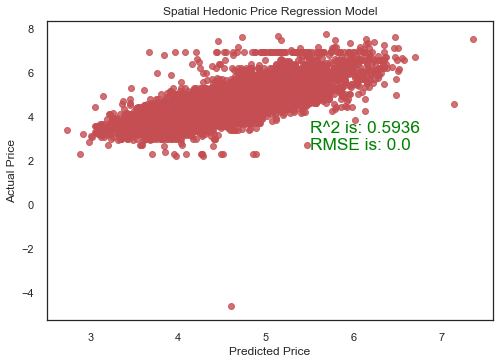

In [35]:


actual_values = y_test
plt.scatter(val_preds_hpm_reg, actual_values, alpha=.8,
            color='r') #alpha helps to show overlapping data
overlay = 'R^2 is: {}\nRMSE is: {}'.format((round(r2_score(y_test, val_preds_hpm_reg),4)),
                    (round(mean_squared_error(y_test, val_preds_hpm_reg))),4)
plt.annotate( s=overlay,xy=(5.5,2.5),size='x-large', color='green')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Spatial Hedonic Price Regression Model')
plt.show()




Each predicted value x ia equal to actual value y if our observed values and actual values were perfectly predicted but here we have a few outliers along with scattered values.

R Squared and Root Mean Square Error Definitions and differences

R-squared and the Root Mean Square Error (RMSE)are both based on two sums of squares: Sum of Squares Total (SST) and Sum of Squares Error (SSE). SST measures how far the data are from the mean, and SSE measures how far the data are from the model’s predicted values. Different combinations of these two values provide different information about how the regression model compares to the mean model.

The difference between SST and SSE is the improvement in prediction from the regression model, compared to the mean model. Dividing that difference by SST gives R-squared. It is the proportional improvement in prediction from the regression model, compared to the mean model.

It indicates the goodness of fit of the model. The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit. As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.


Improving our model

We can try using Ridge Regularization in attempt to reduce the less important features. Ridge Regularization is a process which shrinks the regression coefficients of less important features. It essentially penalizes a number 
of features in a model in order to only keep the most important features.
The Ridge Regularization model uses a parameter such as its "alpha" , which will control the strength of the regularization. Alpha measures the value where the regression line crosses the y-axis

We can loop though difference degress of ALPHA to see how it improves our results.
When alpha is 0, the regression produces the same coefficients as a linear regression. When alpha is very very large, all coefficients are zero.(Below we will use 5 degress of Alpha: [.01,.1,1,10,10]

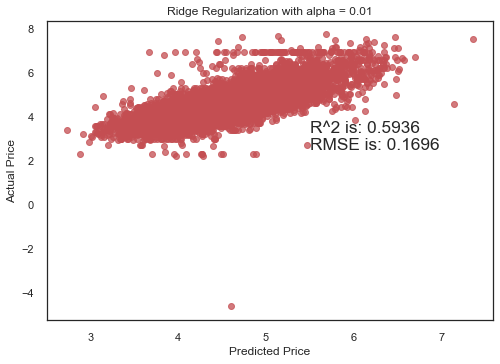

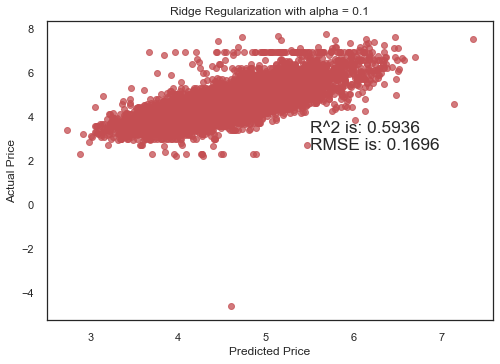

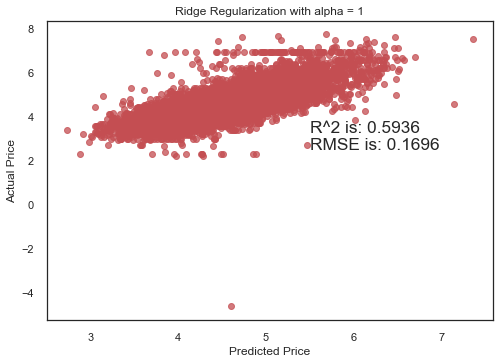

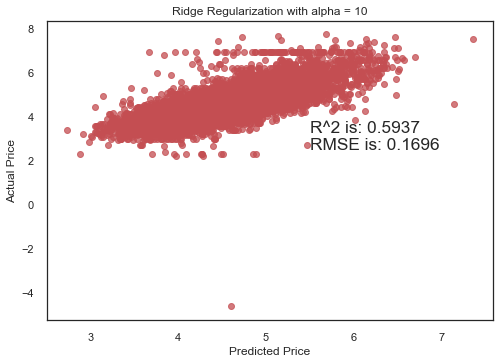

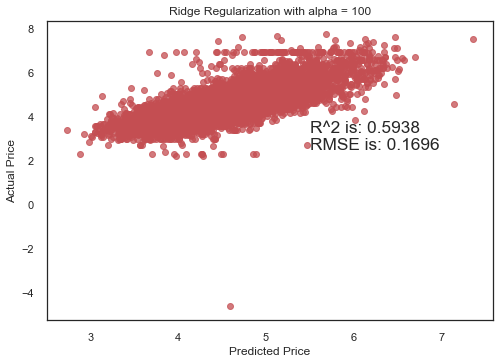

In [36]:
lr = linear_model.LinearRegression()

for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='r')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                   round(ridge_model.score(X_test, y_test), 4),
                    round(mean_squared_error(y_train, training_preds_hpm_reg),4))
    plt.annotate( s=overlay,xy=(5.5,2.5),size='x-large')
    plt.show()

These 5 models perform almost the same as the first model. In our case, adjusting the alpha did not substantially improve our model.

Model 2
XG BOOST



Apart from its superior performance, a benefit of using ensembles of decision tree methods like gradient boosting is that they can automatically provide estimates of feature importance from a trained predictive model.

Generally, feature importance provides a "score" that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance.

This importance is calculated explicitly for each attribute in the dataset, allowing attributes to be ranked and compared to each other.

Importance is calculated for a single decision tree by the amount that each attribute split point improves the performance measure, weighted by the number of observations the node is responsible for. The performance measure may be the purity (Gini index) used to select the split points or another more specific error function.

The feature importances are then averaged across all of the the decision trees within the model.

For more detailed information on how feature importance is calculated in boosted decision trees, see this answer in StackOverflow.
https://stats.stackexchange.com/questions/162162/relative-variable-importance-for-boosting

#I would like to get a FEATURE IMPORTANCE list so I first apply an evaluation method by using mean squared error (for loss) and r squared (for accuracy).

XG BOOST 1 - I run my first model with default parameters

In [37]:
xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

[18:16:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time taken to run: 0.1 minutes

Training MSE: 0.1525
Validation MSE: 0.1524

Training r2: 0.6333
Validation r2: 0.6259


In [38]:


ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg



,weight
host_seniority_6 years,0.000000
refrigerator,0.000000
hot_water,0.000000
host_seniority_2 years,0.000000
host_seniority_5 years,0.000000
...,...
availability_90,0.048326
dryer,0.048388
availability_60,0.049945
tv,0.100886


We can compare the actual output values for X_test with the predicted values in a dataframe:

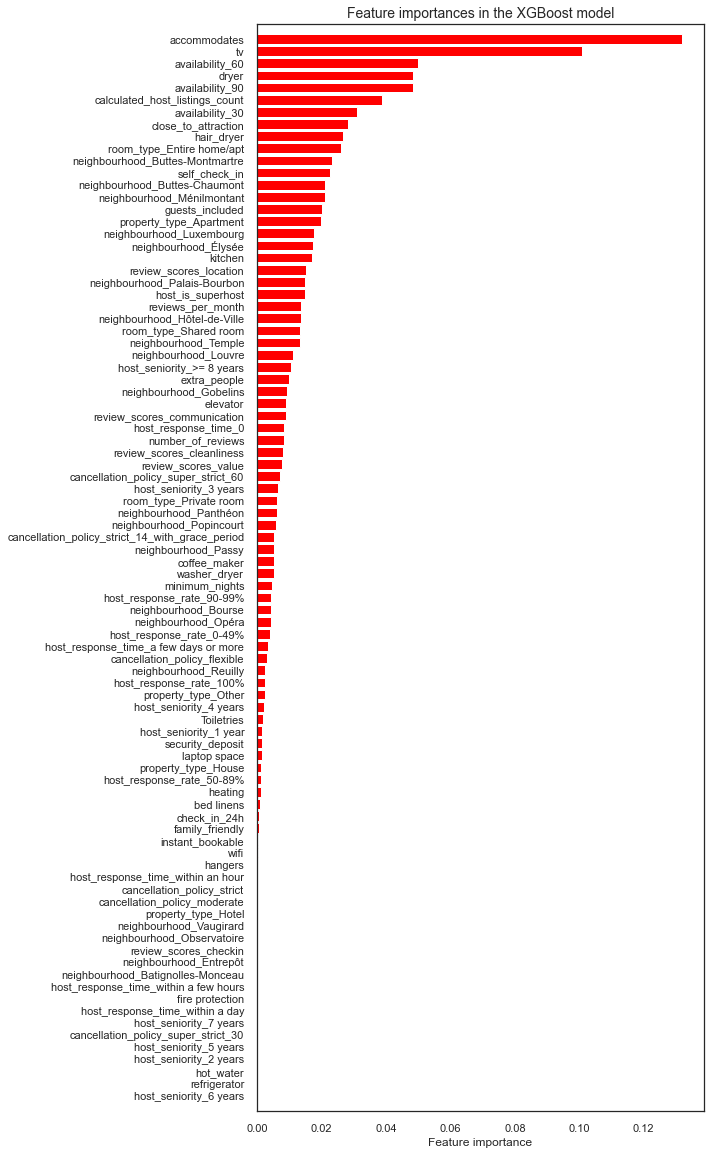

In [39]:
# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center', color='red') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()
fig.savefig('feature_importance')

Below I tune my paramters and rerun run my data with non-default parameters as I choose the 4 options in XG Boost as described below:



n_estimators = Number of trees one wants to build.

learning_rate= Rate at which our model learns patterns in data. After every round, it shrinks the feature weights to reach the best optimum.

max_depth= Determines how deeply each tree is allowed to grow during any boosting round.

colsample_bytree = Percentage of features used per tree.

gamma= Specifies the minimum loss reduction required to make a split.

XG Boost 2 with tuned hyperparameters

In [40]:
booster = xgb.XGBRegressor()

In [41]:
from sklearn.model_selection import GridSearchCV

# create Grid
param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [3, 4, 5, 6, 7],
              'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

# instantiate the tuned random forest
booster_grid_search = GridSearchCV(booster, param_grid, cv=3, n_jobs=-1)

# train the tuned random forest
booster_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(booster_grid_search.best_params_)

[20:08:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [42]:
# instantiate xgboost with parameters
booster = xgb.XGBRegressor(colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, 
                           max_depth=6, n_estimators=200, random_state=4)


# train
booster.fit(X_train, y_train)

# predict
y_pred_train = booster.predict(X_train)
y_pred_test = booster.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE: {round(RMSE, 4)}")



[20:08:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.3642


I see a stronger r2 score from my BOOST MODEL

In [43]:
r2 = r2_score(y_test, y_pred_test)
r2
print(f"r2: {round(r2, 4)}")

r2: 0.6743


In [44]:

Booster_FI = pd.DataFrame(booster.feature_importances_, columns=['weight'], index=X_train.columns)
Booster_FI.sort_values('weight', inplace=True)
Booster_FI


,weight
cancellation_policy_strict,0.000319
host_response_time_within a few hours,0.001836
neighbourhood_Vaugirard,0.002046
security_deposit,0.002279
host_seniority_7 years,0.002495
...,...
calculated_host_listings_count,0.031099
room_type_Shared room,0.031796
room_type_Entire home/apt,0.037666
tv,0.057833


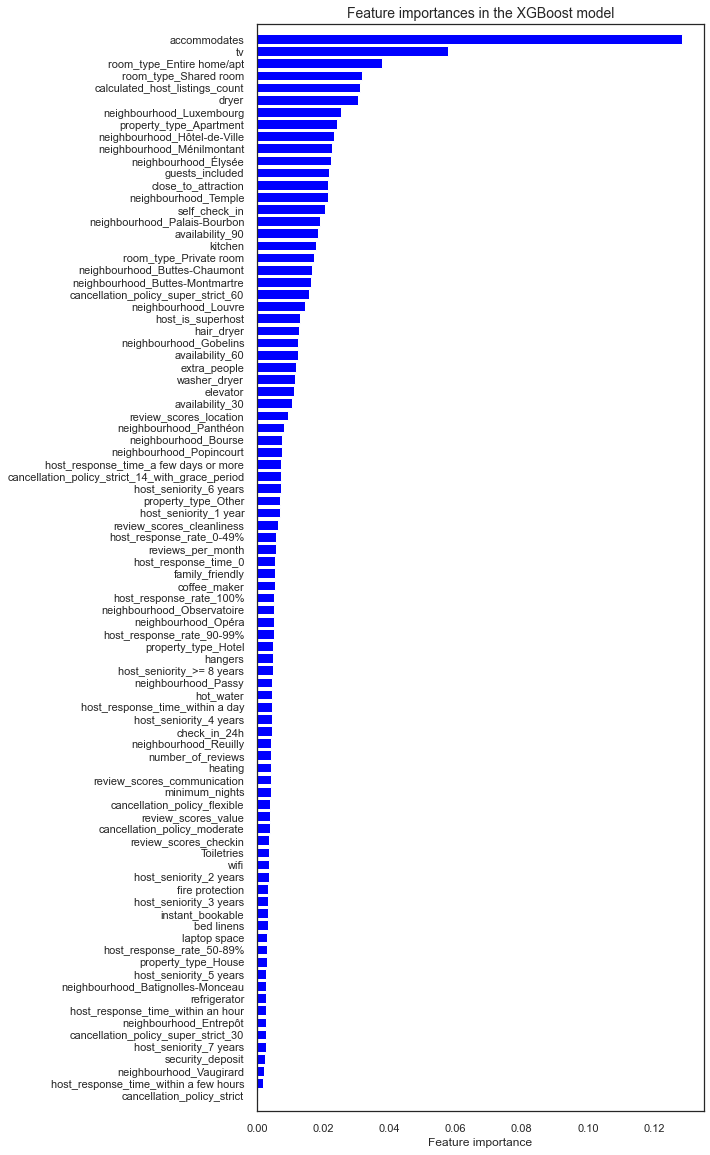

In [65]:
# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(Booster_FI.index, Booster_FI.weight, align='center', color='blue') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

Below I drop review scores accuracy and neighborhood to improve my model by eliminating multicollinearity


In [46]:
all_review = list(X_train.columns[X_train.columns.str.startswith("review_scores_accuracy","neighbourhood")])

review_to_drop = list(X_train.columns[X_train.columns.str.startswith("review_scores_accuracy","neighbourhood")])

X_train_short = X_train.drop(review_to_drop, axis=1)
X_test_short = X_test.drop(review_to_drop, axis=1)

In [47]:
all_review = list(X_train.columns[X_train.columns.str.startswith("neighbourhood")])
review_to_keep = list(X_train.columns[X_train.columns.str.startswith("review_scores_value")])
review_to_drop = [x for x in all_review if x not in review_to_keep]

X_train_short = X_train.drop(review_to_drop, axis=1)
X_test_short = X_test.drop(review_to_drop, axis=1)

In [48]:
import re

 
Model 1 version 2: Spatial Hedonic Price Model (HPM): Hedonic regression with dropped columns
The data adjustment caused a loss of 4 points in accuracy 

In [49]:
shpm_start = time.time()

# Create instance of the model, `LinearRegression` function from 
# Scikit-Learn and fit the model on the training data:

hpm_reg = LinearRegression()  
hpm_reg.fit(X_train_short, y_train) #training the algorithm

# Now that the model has been fit we can make predictions by calling 
# the predict command. We are making predictions on the testing set:
training_preds_hpm_reg = hpm_reg.predict(X_train_short)
val_preds_hpm_reg = hpm_reg.predict(X_test_short)

shpm_end = time.time()

print(f"Time taken to run: {round((shpm_end - shpm_start)/60,1)} minutes")

# Check the predictions against the actual values by using the MSE and R-2 metrics:
print("\nTraining RMSE:", round(mean_squared_error(y_train, training_preds_hpm_reg),4))
print("Validation RMSE:", round(mean_squared_error(y_test, val_preds_hpm_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_hpm_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_hpm_reg),4))

Time taken to run: 0.0 minutes

Training RMSE: 0.1884
Validation RMSE: 0.1828

Training r2: 0.547
Validation r2: 0.5511


XG Boost Model 3 with dropped columns for Review _Scores (0 to 10)

# Model REVISION - I also decide to drop columns using "neighbourhood" and use "close to attraction" to replace location to measure price


In [6]:
review_3 = list(X_train.columns[X_train.columns.str.startswith("neighbourhood")])
review_to_keep = list(X_train.columns[X_train.columns.str.startswith("review_scores_value")])
review_to_drop = [x for x in review_3 if x not in review_to_keep]

X_train_3 = X_train.drop(review_to_drop, axis=1)
X_test_3 = X_test.drop(review_to_drop, axis=1)

NameError: name 'X_train' is not defined

SPATIAL HEDONIC MODEL 4 with dropped neighborhood columns

In [5]:
shpm_start = time.time()


# Create instance of the model, `LinearRegression` function from 

# Scikit-Learn and fit the model on the training data:


hpm_reg1 = LinearRegression()  

hpm_reg1.fit(X_train_3, y_train) #training the algorithm


# Now that the model has been fit we can make predictions by calling 

# the predict command. We are making predictions on the testing set:

training_preds_hpm_reg1 = hpm_reg1.predict(X_train_3)

val_preds_hpm_reg1 = hpm_reg1.predict(X_test_3)


shpm_end = time.time()


print(f"Time taken to run: {round((shpm_end1 - shpm_start1)/60,1)} minutes")


# Check the predictions against the actual values by using the MSE and R-2 metrics:

print("\nTraining RMSE:", round(mean_squared_error(y_train, training_preds_hpm_reg1),4))

print("Validation RMSE:", round(mean_squared_error(y_test, val_preds_hpm_reg1),4))

print("\nTraining r2:", round(r2_score(y_train, training_preds_hpm_reg1),4))

print("Validation r2:", round(r2_score(y_test, val_preds_hpm_reg1),4))




NameError: name 'X_train_3' is not defined

In [55]:
y_test_array = np.array(list(y_test))
val_preds_hpm_reg1_array = np.array(val_preds_hpm_reg1)
hpm_df1 = pd.DataFrame({'Actual': y_test_array.flatten(), 'Predicted': val_preds_hpm_reg1_array.flatten()})
hpm_df1


,Actual,Predicted
0,4.941642,4.622554
1,5.192957,4.529460
2,3.295837,3.056789
3,3.688879,3.737331
4,4.553877,4.324215
...,...,...
16904,4.465908,4.236141
16905,5.686975,5.119792
16906,4.442651,4.628506
16907,4.584967,4.833064


4th XG BOOST with dropped neighbourhood columns - a minor loss in my r2 results 

In [56]:
xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train_3, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train_3)
val_preds_xgb_reg = xgb_reg.predict(X_test_3)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

[20:09:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time taken to run: 0.1 minutes

Training MSE: 0.1598
Validation MSE: 0.1612

Training r2: 0.6159
Validation r2: 0.6041


In [57]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train_3.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg


,weight
host_response_time_within a few hours,0.000000
host_response_time_within an hour,0.000000
cancellation_policy_super_strict_30,0.000000
property_type_Hotel,0.000000
property_type_House,0.000000
...,...
calculated_host_listings_count,0.051709
dryer,0.060288
availability_90,0.063210
tv,0.106347


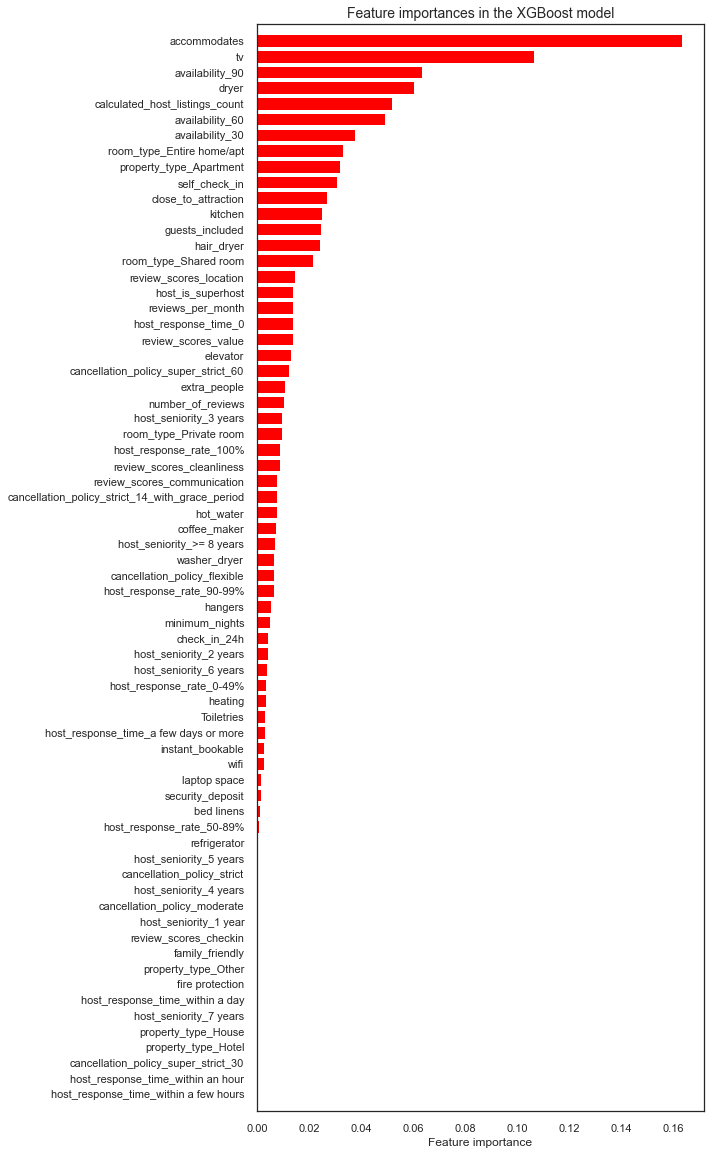

In [58]:
# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center', color='red') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

I know run the tuned XG Boost model on my dataset with the neighborhood dropped

In [59]:
booster2 = xgb.XGBRegressor()

In [66]:
from sklearn.model_selection import GridSearchCV

# create Grid
param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [3, 4, 5, 6, 7],
              'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

# instantiate the tuned random forest
booster2_grid_search = GridSearchCV(booster2, param_grid, cv=3, n_jobs=-1)

# train the tuned random forest
booster2_grid_search.fit(X_train_3, y_train)

# print best estimator parameters found during the grid search
print(booster2_grid_search.best_params_)

[00:33:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200}


In [67]:
# instantiate xgboost with best parameters
booster2 = xgb.XGBRegressor(colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, 
                           max_depth=6, n_estimators=200, random_state=4)

# train
booster2.fit(X_train_3, y_train)

# predict
y_pred_train = booster2.predict(X_train_3)
y_pred_test = booster2.predict(X_test_3)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE: {round(RMSE, 4)}")

[00:33:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.3808


In [68]:
r2 = r2_score(y_test, y_pred_test)
r2
print(f"r2: {round(r2, 4)}")

r2: 0.6439


In [69]:

Booster2_FI = pd.DataFrame(booster2.feature_importances_, columns=['weight'], index=X_train_3.columns)
Booster2_FI.sort_values('weight', inplace=True)
Booster2_FI


,weight
cancellation_policy_strict,0.000378
security_deposit,0.002776
fire protection,0.002782
host_response_rate_50-89%,0.002785
property_type_House,0.003077
...,...
room_type_Entire home/apt,0.039933
guests_included,0.043098
dryer,0.055458
tv,0.086952


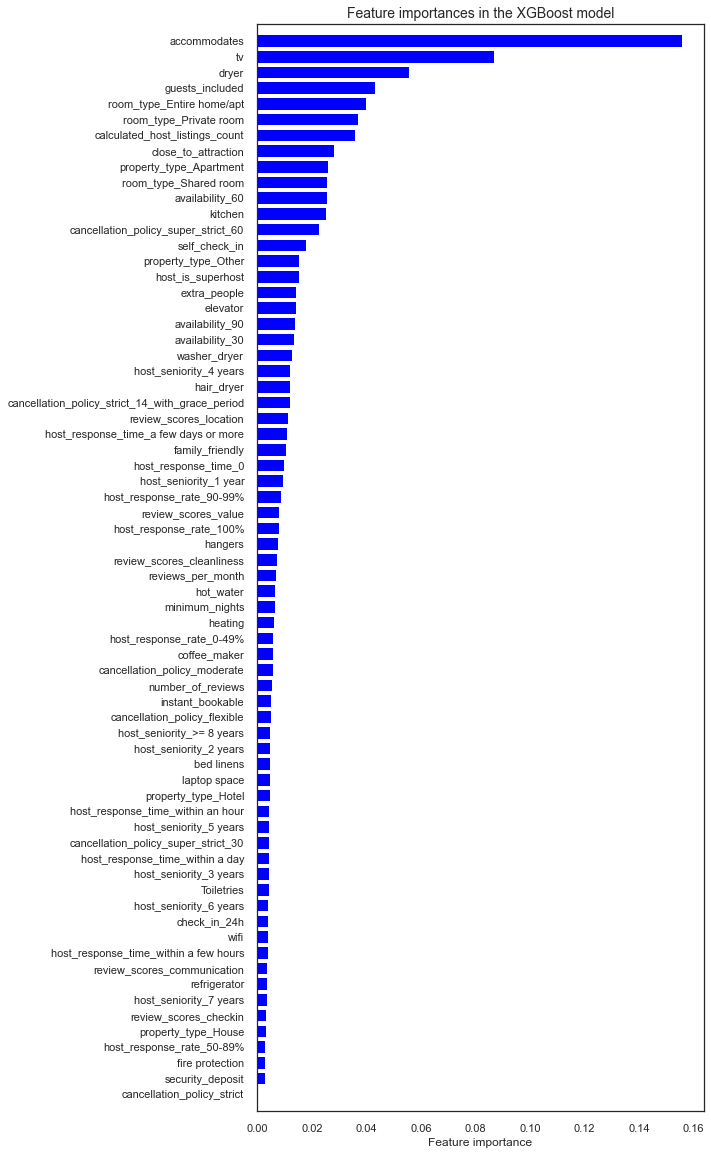

In [70]:
plt.figure(figsize=(8,20))
plt.barh(Booster2_FI.index, Booster2_FI.weight, align='center', color='blue') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()



Both Spatial Hedonic Regression and XGBoost perform almost exactly when the additional columns were removed.

Of course, in the name of memory and physical storage space, we would choose the 2nd model as it requires less data.

Overall, the 1st  XGBoost model is the preferred model, which performs better than both Spatial Hedonic Regression Models. It could possibly be improved further with hyper-parameter tuning and more specific data.

Conclusions and Recommendations

The FIRST TUNED  XG Boost model was able to predict 67% of the variation in price with a RMSE of 0.36. Though we still have 23% unexplained. This could be due to several other features that are not part of our dataset such as ACTUAL rental rate and booking % or the need to analyse our current features more closely such as adding transportation, holiday and event features.

For example, given the importance of customer reviews of the listing in determining price, perhaps a better understanding of the reviews could improve the prediction. Using Sentiment Analysis, a score between -1 (very negative sentiment) and 1 (very positive sentiment) can be assigned to each review per listing property. The scores are then averaged across all the reviews associated with that listing and the final scores can be included as a new feature in the model.

Another suggestion is the inclusion of image quality as a feature. Using Difference-in-Difference deep learning and supervised learning analyses on a Airbnb panel dataset, researchers found that units with verified photos (taken by Airbnb’s photographers) generate additional revenue per year on average (see here).

It was noticeable that reviews about listing location, rather than the location features themselves, were higher in the feature importance list. Thus, this finding could perhaps be used by Airbnb hosts when writing their listing's description. Highlighting accessibility and location benefits of staying with them could perhaps benefit them and how much they can ask for their listing.

READ:https://towardsdatascience.com/interpretable-machine-learning-with-xgboost-9ec80d148d27
